In [1]:
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Nicer plotting
%config InlineBackend.figure_format = 'retina'

In [2]:
d = yaml.safe_load(open('xopt_save_dump_sols.yaml'))
data = pd.DataFrame(d['data'])
data.index = list(map(int, data.index))
data.sort_index(inplace=True)
len(data)

24

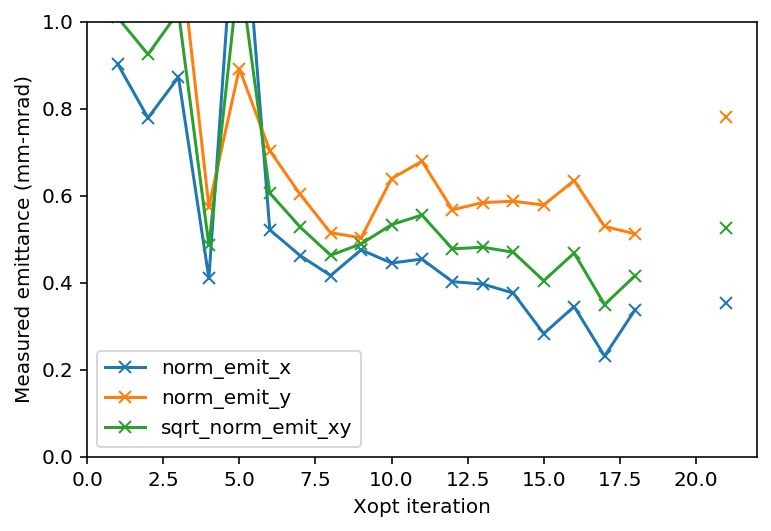

In [3]:
fig, ax = plt.subplots()
for k in ('norm_emit_x', 'norm_emit_y', 'sqrt_norm_emit_xy'):
    ax.plot(data[k]*1e6, label=k, marker='x')
ax.set_ylabel('Measured emittance (mm-mrad)')
ax.set_xlabel('Xopt iteration')
plt.legend()
ax.set_ylim(0, 1)
plotfile= 'xopt-progress.png'
plt.savefig(plotfile)

In [50]:
#data[['SOLN:GUNB:212:BCTRL', 'SOLN:GUNB:823:BCTRL', 'norm_emit_x', 'norm_emit_y', 'jsonfile']] 


data[ [
'QUAD:GUNB:212:1:BCTRL',
'QUAD:GUNB:212:2:BCTRL',
'QUAD:GUNB:823:1:BCTRL',
'QUAD:GUNB:823:2:BCTRL',
    'sqrt_norm_emit_xy'
]]

,QUAD:GUNB:212:1:BCTRL,QUAD:GUNB:212:2:BCTRL,QUAD:GUNB:823:1:BCTRL,QUAD:GUNB:823:2:BCTRL,sqrt_norm_emit_xy
1,0.001076,0.002160,0.000293,0.000406,4.263000e-07
2,0.001411,0.002229,0.000379,0.000600,4.816000e-07
3,0.001418,0.002289,0.000359,0.000209,4.413000e-07
4,-0.001662,0.002320,-0.000426,-0.002620,5.900200e-06
5,0.001960,0.000407,0.000267,0.000215,5.580000e-07
6,0.001863,0.001745,-0.001126,0.000555,8.492000e-07
7,0.001196,0.001230,0.002058,0.000404,7.638000e-07
8,0.001129,0.001176,0.000343,0.000370,4.655000e-07
9,0.001900,0.001781,0.000669,0.000336,4.493000e-07
10,0.001100,0.002688,0.000818,0.000361,4.984000e-07


In [4]:
data['sqrt_norm_emit_xy'].min()

3.497e-07

In [5]:
ibest = data['sqrt_norm_emit_xy'].argmin()
ibest

16

In [6]:
data.iloc[ibest]

SOLN:GUNB:212:BCTRL                                                0.0433
SOLN:GUNB:823:BCTRL                                                0.0244
alpha_x                                                           0.82061
alpha_x_rel_err                                                       0.0
alpha_y                                                          7.697115
alpha_y_rel_err                                                       0.0
beta_x                                                           2.209903
beta_x_rel_err                                                   0.038179
beta_y                                                           5.109082
beta_y_rel_err                                                   0.039152
emit_x                                                                0.0
emit_x_err                                                            0.0
emit_y                                                                0.0
emit_y_err                            

In [7]:
data.iloc[data['sqrt_norm_emit_xy'].argmin()]['sqrt_norm_emit_xy']

3.497e-07

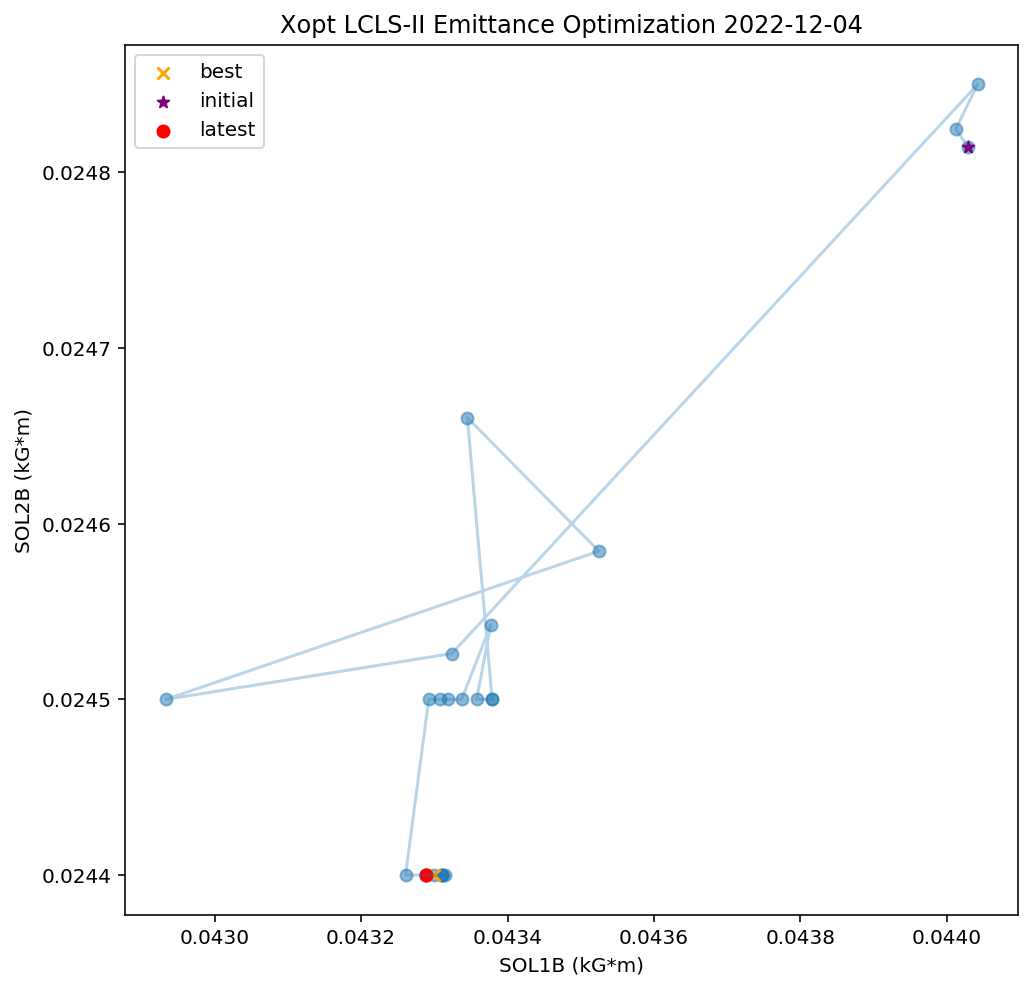

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
x=  data['SOLN:GUNB:212:BCTRL'].to_numpy()
y = data['SOLN:GUNB:823:BCTRL'].to_numpy()
ax.scatter(x,y, alpha=0.5)
ax.plot(x,y, alpha=0.3)
ax.scatter(x[ibest], y[ibest], marker='x', label='best', color='orange')
ax.scatter(x[0], y[0], color='purple', marker='*', label='initial')
ax.scatter(x[-1], y[-1], color='red', label='latest')
ax.set_xlabel('SOL1B (kG*m)')
ax.set_ylabel('SOL2B (kG*m)')
plt.title('Xopt LCLS-II Emittance Optimization 2022-12-04')
plt.legend()

#plotfile= 'xopt-summary.png'
plt.savefig(plotfile)

In [ ]:
plot_emit('sqrt_norm_emit_xy') 

# Contour plot

In [9]:
import matplotlib.tri as tri

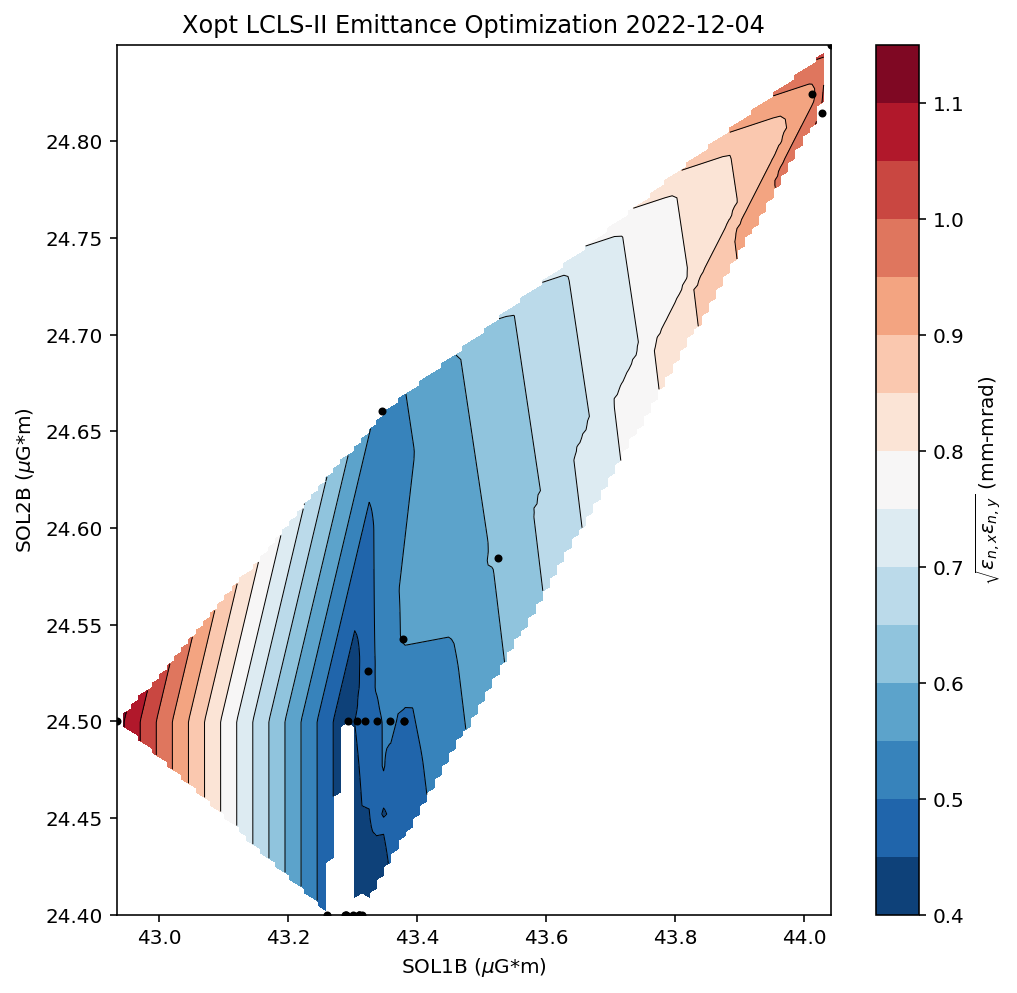

In [11]:
x = data['SOLN:GUNB:212:BCTRL'].to_numpy() * 1e3
y = data['SOLN:GUNB:823:BCTRL'].to_numpy() * 1e3

#x = data['QUAD:GUNB:212:1:BCTRL'].to_numpy() * 1e3
#y = data['QUAD:GUNB:212:2:BCTRL'].to_numpy() * 1e3


#z = data['sqrt_norm_emit_xy'].to_numpy() * 1e6
#zlabel=r'$\sqrt{\epsilon_{n,x}\epsilon_{n,y}}$ (mm-mrad)'

keylabel = {'norm_emit_x': r'$\epsilon_{n,x}$ (mm-mrad)',
            'norm_emit_y': r'$\epsilon_{n,y}$ (mm-mrad)',
            'sqrt_norm_emit_xy': r'$\sqrt{\epsilon_{n,x}\epsilon_{n,y}}$ (mm-mrad)',
           }

def plot_emit(key):
    
    z = data[key].to_numpy() * 1e6
    zlabel=keylabel[key]
    
    
    # Create grid values first.
    
    ngridx = 100
    ngridy = 200
    
    xi = np.linspace(x.min(), x.max(), ngridx)
    yi = np.linspace(y.min(), y.max(), ngridy)
    
    # Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
    triang = tri.Triangulation(x, y)
    interpolator = tri.LinearTriInterpolator(triang, z)
    Xi, Yi = np.meshgrid(xi, yi)
    zi = interpolator(Xi, Yi)
    
    # Note that scipy.interpolate provides means to interpolate data on a grid
    # as well. The following would be an alternative to the four lines above:
    # from scipy.interpolate import griddata
    # zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')
    
    fig, ax = plt.subplots(figsize=(8,8))
    
    ax.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
    cntr1 = ax.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
    
    fig.colorbar(cntr1, ax=ax, label=zlabel)
    ax.plot(x, y, 'ko', ms=3)
    ax.set_xlabel(r'SOL1B ($\mu$G*m)')
    ax.set_ylabel(r'SOL2B ($\mu$G*m)')
    plt.title('Xopt LCLS-II Emittance Optimization 2022-12-04')
    plotfile= 'xopt-summary.png'
    
    #ax.set_xlim(0.044 * 1e3, 0.0442* 1e3)
    #ax.set_ylim(0.0246* 1e3, 0.0248* 1e3)
    
    #plt.savefig(plotfile)
    
plot_emit('sqrt_norm_emit_xy')    

In [ ]:
!pwd

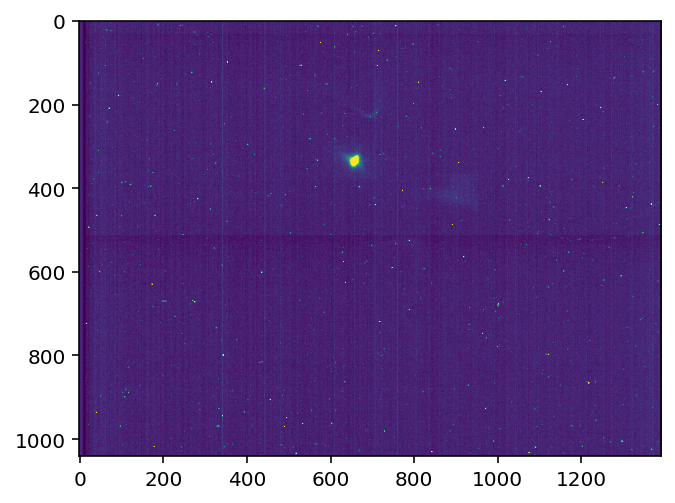

In [47]:
import epics
a = epics.caget('OTRS:HTR:330:Image:ArrayData')
plt.imshow(a.reshape(1040, 1392), vmax=64)